Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график

- Рассчитать коэффициенты корреляции Пирсона и Спирмена

- Построить модель линейной регрессии

- Рассчитать коэффициент детерминации

- Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 6,4

In [2]:
data1 = pd.read_csv('water.csv')

#удаление столбца с нумерацией строк
data = data1.drop('Unnamed: 0', 1)

data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


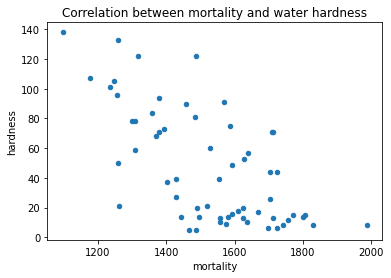

In [3]:
data.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and water hardness')

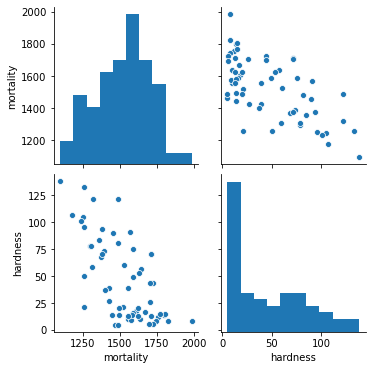

In [4]:
sns.pairplot(data)

In [5]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Существует обратная связь между жесткостью воды и смертностью. Коэффициент корреляции Пирсона = -0.65.

In [6]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Ранговый оэффициент корреляции Спирмана = -0.63.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = data[['mortality']]
y = data[['hardness']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train.shape

(45, 1)

In [11]:
y_train.shape

(45, 1)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([[-0.12737341]])

In [14]:
model.intercept_

array([239.43769743])

In [15]:
y_pred = model.predict(X_test)

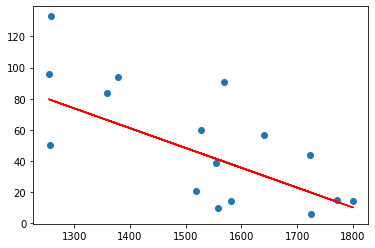

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы

- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [25]:
south = data.loc[data['location'] == 'South']
south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


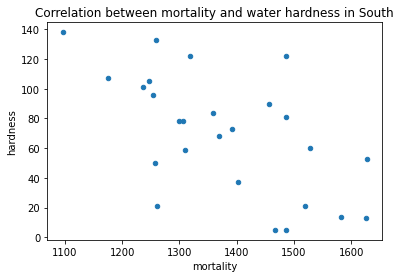

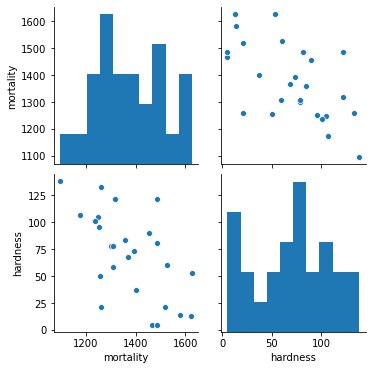

In [30]:
south.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and water hardness in South')

sns.pairplot(south)

In [31]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [32]:
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


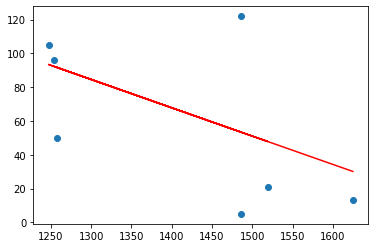

In [33]:
X = south[['mortality']]
y = south[['hardness']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Существует обратная связь между жесткостью воды и смертностью (Южный регион). Коэффициент корреляции Пирсона = -0.60 , Спирмана = -0.60.

In [24]:
north = data.loc[data['location'] == 'North']
north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


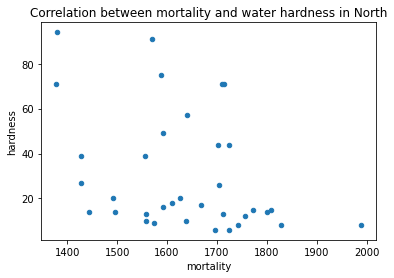

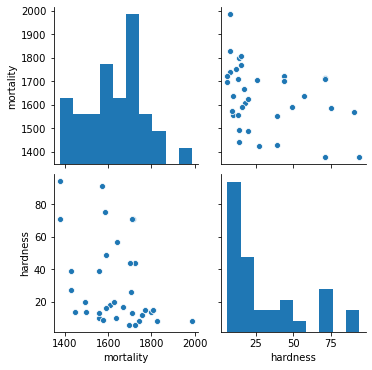

In [35]:
north.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Correlation between mortality and water hardness in North')

sns.pairplot(north)

In [36]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [38]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


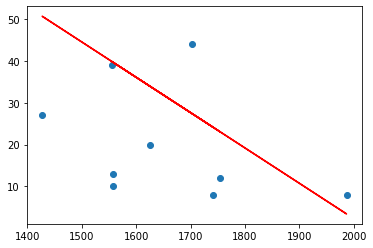

In [39]:
X = north[['mortality']]
y = north[['hardness']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')